### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from time import time

import warnings
warnings.filterwarnings("ignore")

### Read CSV file and make a Pandas Dataframe

In [2]:
from google.colab import files
uploaded = files.upload()

Saving Data.csv to Data.csv


In [3]:
import io
data = pd.read_csv(io.BytesIO(uploaded['Data.csv']))
# Dataset is now stored in a Pandas Dataframe

In [4]:
data.head(5)

,Category Name,order date (DateOrders),Order Item Discount,Order Item Quantity,Sales
0,Sporting Goods,1/31/2018 22:56,13.110000,1,327.75
1,Sporting Goods,1/13/2018 12:27,16.389999,1,327.75
2,Sporting Goods,1/13/2018 12:06,18.030001,1,327.75
3,Sporting Goods,1/13/2018 11:45,22.940001,1,327.75
4,Sporting Goods,1/13/2018 11:24,29.500000,1,327.75


In [5]:
data["Category Name"].unique()

array(['Sporting Goods', 'Cleats', 'Shop By Sport', "Women's Apparel",
       'Electronics', 'Boxing & MMA', 'Cardio Equipment', 'Trade-In',
       "Kids' Golf Clubs", 'Hunting & Shooting', 'Baseball & Softball',
       "Men's Footwear", 'Camping & Hiking', 'Consumer Electronics',
       'Cameras ', 'Computers', 'Basketball', 'Soccer', "Girls' Apparel",
       'Accessories', "Women's Clothing", 'Crafts', "Men's Clothing",
       'Tennis & Racquet', 'Fitness Accessories', 'As Seen on  TV!',
       'Golf Balls', 'Strength Training', "Children's Clothing",
       'Lacrosse', 'Baby ', 'Fishing', 'Books ', 'DVDs', 'CDs ', 'Garden',
       'Hockey', 'Pet Supplies', 'Health and Beauty', 'Music',
       'Video Games', 'Golf Gloves', 'Golf Bags & Carts', 'Golf Shoes',
       'Golf Apparel', "Women's Golf Clubs", "Men's Golf Clubs", 'Toys',
       'Water Sports', 'Indoor/Outdoor Games'], dtype=object)

### Feature Extraction for working upon on Dataframe

In [6]:
filter = data['Category Name'].isin(["Camping & Hiking"])
#display the filter
filter5 = data[filter]

In [7]:
filter5.shape

(13729, 5)

In [8]:
filter5.head()

,Category Name,order date (DateOrders),Order Item Discount,Order Item Quantity,Sales
143,Camping & Hiking,11/3/2016 21:49,3.0,1,299.980011
144,Camping & Hiking,8/25/2016 22:16,6.0,1,299.980011
1343,Camping & Hiking,1/5/2017 4:24,9.0,1,299.980011
1344,Camping & Hiking,9/18/2016 12:26,12.0,1,299.980011
1345,Camping & Hiking,11/30/2016 7:57,21.0,1,299.980011


In [9]:
filter5 = data.loc[filter, ['order date (DateOrders)','Sales','Order Item Quantity','Order Item Discount']]
filter5.head()

,order date (DateOrders),Sales,Order Item Quantity,Order Item Discount
143,11/3/2016 21:49,299.980011,1,3.0
144,8/25/2016 22:16,299.980011,1,6.0
1343,1/5/2017 4:24,299.980011,1,9.0
1344,9/18/2016 12:26,299.980011,1,12.0
1345,11/30/2016 7:57,299.980011,1,21.0


### Applying to Pandas DateTime format for easy access

In [10]:
filter5['order date (DateOrders)'] =  filter5['order date (DateOrders)'].apply(pd.to_datetime)
filter5.head()

,order date (DateOrders),Sales,Order Item Quantity,Order Item Discount
143,2016-11-03 21:49:00,299.980011,1,3.0
144,2016-08-25 22:16:00,299.980011,1,6.0
1343,2017-01-05 04:24:00,299.980011,1,9.0
1344,2016-09-18 12:26:00,299.980011,1,12.0
1345,2016-11-30 07:57:00,299.980011,1,21.0


### Sorting the records by date and their time

In [11]:
filter5 = filter5.sort_values(by='order date (DateOrders)')
filter5.head(10)

,order date (DateOrders),Sales,Order Item Quantity,Order Item Discount
33833,2015-01-01 00:00:00,299.980011,1,60.0
20695,2015-01-01 01:24:00,299.980011,1,54.0
20680,2015-01-01 01:24:00,299.980011,1,51.0
64753,2015-01-01 02:06:00,299.980011,1,48.0
140739,2015-01-01 03:51:00,299.980011,1,45.0
45990,2015-01-01 06:18:00,299.980011,1,39.0
166070,2015-01-01 07:42:00,299.980011,1,36.0
60534,2015-01-01 09:27:00,299.980011,1,30.0
60513,2015-01-01 09:27:00,299.980011,1,27.0
110145,2015-01-01 11:33:00,299.980011,1,21.0


### Making column of Order date to Index

In [12]:
filter5.set_axis(filter5['order date (DateOrders)'], inplace=True)

filter5.drop(columns=['order date (DateOrders)'],inplace=True)
filter5.head()

,Sales,Order Item Quantity,Order Item Discount
order date (DateOrders),,,
2015-01-01 00:00:00,299.980011,1,60.0
2015-01-01 01:24:00,299.980011,1,54.0
2015-01-01 01:24:00,299.980011,1,51.0
2015-01-01 02:06:00,299.980011,1,48.0
2015-01-01 03:51:00,299.980011,1,45.0


### Day-wise Aggregates

In [13]:
Item_quantity = filter5.groupby([(filter5.index.year), (filter5.index.month), (filter5.index.day)])['Order Item Quantity'].sum().astype(int)
Item_discount = filter5.groupby([(filter5.index.year), (filter5.index.month), (filter5.index.day)])['Order Item Discount'].sum().astype(int)
Item_sales = filter5.groupby([(filter5.index.year), (filter5.index.month), (filter5.index.day)])['Sales'].sum().astype(int)

In [14]:
ItemSales=pd.DataFrame(Item_sales)
ItemDiscount=pd.DataFrame(Item_discount)
ItemQuantity=pd.DataFrame(Item_quantity)

In [15]:
total=ItemSales.join(ItemDiscount)


In [16]:
daily_Sales=total.join(ItemQuantity)

In [17]:
daily_Sales.head(5)

Sales  \
order date (DateOrders) order date (DateOrders) order date (DateOrders)          
2015                    1                       1                         5999   
                                                2                         4499   
                                                3                         4199   
                                                4                         4499   
                                                5                         3599   

                                                                         Order Item Discount  \
order date (DateOrders) order date (DateOrders) order date (DateOrders)                        
2015                    1                       1                                        661   
                                                2                                        358   
                                                3                                        529   
                                                4                                        504   
                                                5                                        349   

                                                                         Order Item Quantity  
order date (DateOrders) order date (DateOrders) order date (DateOrders)                       
2015                    1                       1                                         20  
                                                2                                         15  
                                                3                                         14  
                                                4                                         15  
                                                5                                         12

### Converting index to single column only

In [18]:
y = daily_Sales.index.get_level_values(0)
m = daily_Sales.index.get_level_values(1)
d = daily_Sales.index.get_level_values(2)

In [19]:
daily_Sales['Date'] = pd.to_datetime(y* 10000 + m * 100 + d * 1, format="%Y%m%d")

In [20]:
daily_Sales.set_index('Date', append=True, inplace=True)

In [21]:
daily_Sales=daily_Sales.droplevel(0)
daily_Sales=daily_Sales.droplevel(0)
daily_Sales=daily_Sales.droplevel(0)

In [22]:
daily_Sales.head(5)

,Sales,Order Item Discount,Order Item Quantity
Date,,,
2015-01-01,5999,661,20
2015-01-02,4499,358,15
2015-01-03,4199,529,14
2015-01-04,4499,504,15
2015-01-05,3599,349,12


In [23]:
daily_Sales.shape

(1006, 3)

In [24]:
Total = daily_Sales['Order Item Quantity'].sum()
print(Total)

13729


In [25]:
Camping_Hiking_Sold = daily_Sales[["Order Item Quantity"]]
Camping_Hiking_Sold.tail()

,Order Item Quantity
Date,
2017-09-28,13
2017-09-29,16
2017-09-30,7
2017-10-01,11
2017-10-02,4


In [26]:
Camping_Hiking_Sold.shape

(1006, 1)

# DATA PREPARATION

## FEATURE ENGINEERING

Considering the prior 90 days sales to predict the number of items sold for the month of April_2015 till Sept_2017 

In [27]:
April_2015 = Camping_Hiking_Sold.iloc[1:90]
May_2015 = Camping_Hiking_Sold.iloc[31:120]
June_2015 = Camping_Hiking_Sold.iloc[62:151]
July_2015 = Camping_Hiking_Sold.iloc[92:181]
August_2015 = Camping_Hiking_Sold.iloc[123:212]
Sept_2015 = Camping_Hiking_Sold.iloc[154:243]
Oct_2015 = Camping_Hiking_Sold.iloc[184:273]
Nov_2015 = Camping_Hiking_Sold.iloc[215:304]
Dec_2015 = Camping_Hiking_Sold.iloc[245:334]
Jan_2016 = Camping_Hiking_Sold.iloc[276:365]
Feb_2016 = Camping_Hiking_Sold.iloc[307:396]
March_2016 = Camping_Hiking_Sold.iloc[336:425]
April_2016 = Camping_Hiking_Sold.iloc[367:456]
May_2016 = Camping_Hiking_Sold.iloc[397:486]
June_2016 = Camping_Hiking_Sold.iloc[428:517]
July_2016 = Camping_Hiking_Sold.iloc[458:547]
August_2016 = Camping_Hiking_Sold.iloc[489:578]
Sept_2016 = Camping_Hiking_Sold.iloc[520:609]
Oct_2016 = Camping_Hiking_Sold.iloc[550:639]
Nov_2016 = Camping_Hiking_Sold.iloc[581:670]
Dec_2016 = Camping_Hiking_Sold.iloc[611:700]
Jan_2017 = Camping_Hiking_Sold.iloc[642:731]
Feb_2017 = Camping_Hiking_Sold.iloc[673:762]
March_2017 = Camping_Hiking_Sold.iloc[701:790]
April_2017 = Camping_Hiking_Sold.iloc[732:821]
May_2017 = Camping_Hiking_Sold.iloc[762:851]
June_2017 = Camping_Hiking_Sold.iloc[793:882]
July_2017 = Camping_Hiking_Sold.iloc[823:912]
August_2017 = Camping_Hiking_Sold.iloc[854:943]
Sept_2017 = Camping_Hiking_Sold.iloc[885:974]

### Taking Transpose to convert 90 days sales as Single row/record for each month to be predicted


In [28]:
Row_1 = pd.DataFrame(April_2015.to_numpy().T).add_prefix('Day')
Row_2 = pd.DataFrame(May_2015.to_numpy().T).add_prefix('Day')
Row_3 = pd.DataFrame(June_2015.to_numpy().T).add_prefix('Day')
Row_4 = pd.DataFrame(July_2015.to_numpy().T).add_prefix('Day')
Row_5 = pd.DataFrame(August_2015.to_numpy().T).add_prefix('Day')
Row_6 = pd.DataFrame(Sept_2015.to_numpy().T).add_prefix('Day')
Row_7 = pd.DataFrame(Oct_2015.to_numpy().T).add_prefix('Day')
Row_8 = pd.DataFrame(Nov_2015.to_numpy().T).add_prefix('Day')
Row_9 = pd.DataFrame(Dec_2015.to_numpy().T).add_prefix('Day')
Row_10 = pd.DataFrame(Jan_2016.to_numpy().T).add_prefix('Day')
Row_11 = pd.DataFrame(Feb_2016.to_numpy().T).add_prefix('Day')
Row_12 = pd.DataFrame(March_2016.to_numpy().T).add_prefix('Day')
Row_13 = pd.DataFrame(April_2016.to_numpy().T).add_prefix('Day')
Row_14 = pd.DataFrame(May_2016.to_numpy().T).add_prefix('Day')
Row_15 = pd.DataFrame(June_2016.to_numpy().T).add_prefix('Day')
Row_16 = pd.DataFrame(July_2016.to_numpy().T).add_prefix('Day')
Row_17 = pd.DataFrame(August_2016.to_numpy().T).add_prefix('Day')
Row_18 = pd.DataFrame(Sept_2016.to_numpy().T).add_prefix('Day')
Row_19 = pd.DataFrame(Oct_2016.to_numpy().T).add_prefix('Day')
Row_20 = pd.DataFrame(Nov_2016.to_numpy().T).add_prefix('Day')
Row_21 = pd.DataFrame(Dec_2016.to_numpy().T).add_prefix('Day')
Row_22 = pd.DataFrame(Jan_2017.to_numpy().T).add_prefix('Day')
Row_23 = pd.DataFrame(Feb_2017.to_numpy().T).add_prefix('Day')
Row_24 = pd.DataFrame(March_2017.to_numpy().T).add_prefix('Day')
Row_25 = pd.DataFrame(April_2017.to_numpy().T).add_prefix('Day')
Row_26 = pd.DataFrame(May_2017.to_numpy().T).add_prefix('Day')
Row_27 = pd.DataFrame(June_2017.to_numpy().T).add_prefix('Day')
Row_28 = pd.DataFrame(July_2017.to_numpy().T).add_prefix('Day')
Row_29 = pd.DataFrame(August_2017.to_numpy().T).add_prefix('Day')
Row_30 = pd.DataFrame(Sept_2017.to_numpy().T).add_prefix('Day')

In [29]:
Row_30

,Day0,Day1,Day2,Day3,Day4,Day5,Day6,Day7,Day8,Day9,...,Day79,Day80,Day81,Day82,Day83,Day84,Day85,Day86,Day87,Day88
0,10,17,10,10,16,12,12,13,16,20,...,16,13,13,9,8,13,7,9,12,13


### Merging all Rows to prepare the DataFrame

In [30]:
merge2=Row_1.append(Row_2,ignore_index=True)
merge3=merge2.append(Row_3,ignore_index=True)
merge4=merge3.append(Row_4,ignore_index=True)
merge5=merge4.append(Row_5,ignore_index=True)
merge6=merge5.append(Row_6,ignore_index=True)
merge7=merge6.append(Row_7,ignore_index=True)
merge8=merge7.append(Row_8,ignore_index=True)
merge9=merge8.append(Row_9,ignore_index=True)
merge10=merge9.append(Row_10,ignore_index=True)
merge11=merge10.append(Row_11,ignore_index=True)
merge12=merge11.append(Row_12,ignore_index=True)
merge13=merge12.append(Row_13,ignore_index=True)
merge14=merge13.append(Row_14,ignore_index=True)
merge15=merge14.append(Row_15,ignore_index=True)
merge16=merge15.append(Row_16,ignore_index=True)
merge17=merge16.append(Row_17,ignore_index=True)
merge18=merge17.append(Row_18,ignore_index=True)
merge19=merge18.append(Row_19,ignore_index=True)
merge20=merge19.append(Row_20,ignore_index=True)
merge21=merge20.append(Row_21,ignore_index=True)
merge22=merge21.append(Row_22,ignore_index=True)
merge23=merge22.append(Row_23,ignore_index=True)
merge24=merge23.append(Row_24,ignore_index=True)
merge25=merge24.append(Row_25,ignore_index=True)
merge26=merge25.append(Row_26,ignore_index=True)
merge27=merge26.append(Row_27,ignore_index=True)
merge28=merge27.append(Row_28,ignore_index=True)
merge29=merge28.append(Row_29,ignore_index=True)
merge30=merge29.append(Row_30,ignore_index=True)

In [31]:
merge30

,Day0,Day1,Day2,Day3,Day4,Day5,Day6,Day7,Day8,Day9,...,Day79,Day80,Day81,Day82,Day83,Day84,Day85,Day86,Day87,Day88
0,15,14,15,12,13,14,18,9,14,15,...,16,12,8,8,15,8,16,14,22,16
1,13,16,17,15,15,13,9,14,16,16,...,8,13,11,14,12,13,18,12,11,10
2,19,7,14,8,14,14,19,13,12,10,...,11,13,9,14,8,14,12,15,22,14
3,14,11,7,17,19,9,16,23,14,18,...,14,14,18,9,13,14,13,6,21,18
4,15,13,13,15,9,6,7,11,13,11,...,16,16,15,6,16,11,15,20,7,19
5,10,5,15,21,17,19,11,20,7,17,...,12,12,5,20,15,13,7,13,19,17
6,10,9,10,16,7,8,14,19,12,12,...,13,15,13,11,14,14,21,19,14,12
7,15,11,18,16,8,14,11,16,21,14,...,8,16,14,20,13,20,14,13,9,10
8,14,20,21,11,10,12,19,12,13,16,...,17,12,18,19,13,18,13,9,15,11
9,10,11,13,15,16,19,9,14,24,10,...,4,14,11,17,11,18,13,15,18,15


### Month-wise Aggregated values from April_2015 till Sept_2017

In [32]:
monthlyquantity = daily_Sales.groupby([(daily_Sales.index.year), (daily_Sales.index.month)])['Order Item Quantity'].sum().astype(int)
monthlydiscount = daily_Sales.groupby([(daily_Sales.index.year), (daily_Sales.index.month)])['Order Item Discount'].sum().astype(int)

In [33]:
monthlydiscount.head()

Date  Date
2015  1       12641
      2       11897
      3       12409
      4       12675
      5       11902
Name: Order Item Discount, dtype: int64

### Convert into a dataframe

In [34]:
Monthly_Quantity=pd.DataFrame(monthlyquantity)
Monthly_Discount=pd.DataFrame(monthlydiscount)

In [35]:
a = Monthly_Quantity.index.get_level_values(0)
b = Monthly_Quantity.index.get_level_values(1)
c = Monthly_Discount.index.get_level_values(0)
e = Monthly_Discount.index.get_level_values(1)

In [36]:
Monthly_Quantity['Index'] = pd.to_datetime(a* 10000 + b * 100 + 1, format="%Y%m%d")
Monthly_Discount['Index'] = pd.to_datetime(c* 10000 + e * 100 + 1, format="%Y%m%d")

In [37]:
Monthly_Quantity.set_index('Index', append=True, inplace=True)
Monthly_Discount.set_index('Index', append=True, inplace=True)

Monthly_Quantity=Monthly_Quantity.droplevel(0)
Monthly_Quantity=Monthly_Quantity.droplevel(0)
Monthly_Discount=Monthly_Discount.droplevel(0)
Monthly_Discount=Monthly_Discount.droplevel(0)

In [38]:
Monthly_Quantity.head()

,Order Item Quantity
Index,
2015-01-01,415
2015-02-01,392
2015-03-01,405
2015-04-01,417
2015-05-01,392


In [39]:
Monthly_Quantity.shape

(34, 1)

### Slicing and Selecting monthly Items sold from April_2015 till Sept_2017

In [40]:
MonthlyDiscount = Monthly_Discount.iloc[3:33]
MonthlyQuantity = Monthly_Quantity.iloc[3:33]

In [41]:
MonthlyQuantity.shape

(30, 1)

### List down the values of monthly Item Quantity sold from April_2015 till Sept_2017

In [42]:
MonthlyItemQuantity = MonthlyQuantity['Order Item Quantity'].tolist()
MonthlyItemDiscount = MonthlyDiscount['Order Item Discount'].tolist()
print(MonthlyItemQuantity)
print(MonthlyItemDiscount)

[417, 392, 411, 412, 407, 436, 428, 430, 389, 416, 383, 433, 384, 426, 421, 418, 419, 385, 422, 426, 395, 425, 422, 450, 436, 451, 410, 431, 391, 436]
[12675, 11902, 12437, 12467, 12461, 13170, 13086, 13092, 11758, 12680, 11664, 13150, 11548, 13067, 12643, 12821, 12779, 11593, 12917, 12796, 12035, 13046, 12663, 13677, 13369, 13723, 12368, 13054, 12005, 13158]


### Create a copy of the dataset

In [43]:
df1 = merge30.copy()

In [44]:
df1.head()

,Day0,Day1,Day2,Day3,Day4,Day5,Day6,Day7,Day8,Day9,...,Day79,Day80,Day81,Day82,Day83,Day84,Day85,Day86,Day87,Day88
0,15,14,15,12,13,14,18,9,14,15,...,16,12,8,8,15,8,16,14,22,16
1,13,16,17,15,15,13,9,14,16,16,...,8,13,11,14,12,13,18,12,11,10
2,19,7,14,8,14,14,19,13,12,10,...,11,13,9,14,8,14,12,15,22,14
3,14,11,7,17,19,9,16,23,14,18,...,14,14,18,9,13,14,13,6,21,18
4,15,13,13,15,9,6,7,11,13,11,...,16,16,15,6,16,11,15,20,7,19


### Adding the Target variable to the dataframe


In [45]:
df1.insert(loc=89, column='Order Item Quantity', value=MonthlyItemQuantity)

In [46]:
df1

,Day0,Day1,Day2,Day3,Day4,Day5,Day6,Day7,Day8,Day9,...,Day80,Day81,Day82,Day83,Day84,Day85,Day86,Day87,Day88,Order Item Quantity
0,15,14,15,12,13,14,18,9,14,15,...,12,8,8,15,8,16,14,22,16,417
1,13,16,17,15,15,13,9,14,16,16,...,13,11,14,12,13,18,12,11,10,392
2,19,7,14,8,14,14,19,13,12,10,...,13,9,14,8,14,12,15,22,14,411
3,14,11,7,17,19,9,16,23,14,18,...,14,18,9,13,14,13,6,21,18,412
4,15,13,13,15,9,6,7,11,13,11,...,16,15,6,16,11,15,20,7,19,407
5,10,5,15,21,17,19,11,20,7,17,...,12,5,20,15,13,7,13,19,17,436
6,10,9,10,16,7,8,14,19,12,12,...,15,13,11,14,14,21,19,14,12,428
7,15,11,18,16,8,14,11,16,21,14,...,16,14,20,13,20,14,13,9,10,430
8,14,20,21,11,10,12,19,12,13,16,...,12,18,19,13,18,13,9,15,11,389
9,10,11,13,15,16,19,9,14,24,10,...,14,11,17,11,18,13,15,18,15,416


### Segregating Features and Target Variable

In [47]:
Y = df1["Order Item Quantity"]
X = df1.drop(columns=["Order Item Quantity"])

# Fitting the Model


## XgBoost Regressor¶
    VARIATION-I [FEATURES : Previous 90 Days Sales]

Previous 89 days Items Sold data is used as features to predict the Items Sold in the next month.

### Train Test Split

In [48]:
from sklearn.model_selection import train_test_split
training_data, testing_data = train_test_split(df1, test_size=0.2, shuffle=True, random_state=1)
print(f"No. of training examples: {training_data.shape[0]}")
print(f"No. of testing examples: {testing_data.shape[0]}")

No. of training examples: 24
No. of testing examples: 6


In [49]:
x_train, y_train = training_data.drop("Order Item Quantity", axis=1), training_data['Order Item Quantity']
x_test, y_test   = testing_data.drop("Order Item Quantity", axis=1) , testing_data['Order Item Quantity']

In [50]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error
model = xgb.XGBRegressor(n_estimators=1000)
model.fit(x_train, y_train)

[22:58:22] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(n_estimators=1000)

In [51]:
preds = pd.DataFrame(model.predict(x_test))

### Evaluation Metric

In [52]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [53]:
print("\tMean absolute error (MAE):", mean_absolute_error(y_test, preds))
print("\tRoot Mean squared error (RMSE):",  np.sqrt(mean_squared_error(y_test, preds)))

	Mean absolute error (MAE): 16.348403930664062
	Root Mean squared error (RMSE): 21.418435067462287


In [54]:
from sklearn.metrics import mean_absolute_percentage_error
mean_absolute_percentage_error(y_test, preds)*100

4.19265860915124

In [55]:
print(y_test)

print(preds)

17    385
21    425
10    383
19    426
14    421
20    395
Name: Order Item Quantity, dtype: int64
            0
0  416.174805
1  425.742157
2  418.396912
3  420.984009
4  417.343933
5  417.104492


# K-fold Cross Validation¶

In [56]:
#import necessary libraries

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from numpy import mean
from numpy import absolute
from numpy import sqrt

We’ll fit a XGBOOST model to the dataset and perform k-fold cross validation to evaluate the model performance.

In [57]:
#define cross-validation method to use

cv = KFold(n_splits=10, random_state=1, shuffle=True)

#build xtreme gradient boosting model
xgboost = xgb.XGBRegressor() 


### Model Fitting and Model Evaluation

In [58]:
#use k-fold CV to evaluate model
score1 = cross_val_score(xgboost, X, Y, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)
#view mean absolute errors
score1

array([-23.22333781, -11.84896851,  -8.60389201, -16.66792806,
       -18.82806396, -19.62679036, -10.05088298,  -7.30343628,
       -18.89665731, -21.5320638 ])

In [59]:
print("\tMean absolute error (MAE):", mean(absolute(score1)))

	Mean absolute error (MAE): 15.658202107747396


In [60]:
score2 = cross_val_score(xgboost, X, Y, scoring='neg_mean_squared_error',
                         cv=cv, n_jobs=-1)
print("\tRoot Mean squared error (RMSE):", sqrt(mean(absolute(score2))))

	Root Mean squared error (RMSE): 19.881631707144596


##### Calculating Mean Absolute Percentage Error with custom function

In [61]:
from sklearn.metrics import make_scorer

#define custom function which returns single output as metric score
def MAPE(y_true, y_pred): 
    return 1 - np.mean(np.abs((y_true - y_pred) / y_true)) * 100

#make scorer from custome function
mape_scorer = make_scorer(MAPE)

#cross validation score on model
#reg = LinearRegression()
score3 = cross_val_score(xgboost, X, Y, scoring=mape_scorer, cv=cv)
score3

[22:58:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:58:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:58:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:58:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:58:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:58:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:58:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:58:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

array([-5.03324019, -1.91950056, -1.08284161, -2.84339955, -3.23672339,
       -3.59163762, -1.52811778, -0.71913895, -3.82777297, -4.18353099])

In [62]:
print("\t Mean Absolute Percentage error (MAPE):", mean(absolute(score3)))

	 Mean Absolute Percentage error (MAPE): 2.796590360409385


### Predicted Values

In [63]:
predictions = cross_val_predict(xgboost, X,Y, cv=cv)
print(predictions)

[22:58:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:58:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:58:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:58:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:58:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:58:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:58:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:58:25] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

## XgBoost Regressor
    VARIATION-II [FEATURES : Previous 90 Days Sales + Monthly Item Discount]

In [64]:
df2 = df1.copy()

### Adding a Regressor variable to the dataframe

In [65]:
df2.insert(loc=90, column='Order Item Discount', value=MonthlyItemDiscount)

In [66]:
Y1 = df2["Order Item Quantity"]
X1 = df2.drop(columns=["Order Item Quantity"])

In [115]:
training_data, testing_data = train_test_split(df2, test_size=0.2, shuffle=False, random_state=1)
print(f"No. of training examples: {training_data.shape[0]}")
print(f"No. of testing examples: {testing_data.shape[0]}")

No. of training examples: 24
No. of testing examples: 6


In [116]:
x_train, y_train = training_data.drop("Order Item Quantity", axis=1), training_data['Order Item Quantity']
x_test, y_test   = testing_data.drop("Order Item Quantity", axis=1) , testing_data['Order Item Quantity']

# XGBOOST PREDICTION

In [117]:
xgboost.fit(x_train, y_train)

[23:00:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor()

In [118]:
Row25 = x_test.head(1)
Actual_value2 = y_test.head(1)

In [119]:
xgboost_prediction2 = pd.DataFrame(xgboost.predict(Row25))
print(xgboost_prediction2)
print(Actual_value2)

            0
0  433.387878
24    436
Name: Order Item Quantity, dtype: int64


In [120]:
print("\tMean absolute error (MAE):", mean_absolute_error(Actual_value2, xgboost_prediction2))

	Mean absolute error (MAE): 2.61212158203125


### Model Fitting and Model Evaluation

In [67]:
#build xtreme gradient boosting model
xgboost = xgb.XGBRegressor() 

In [68]:
#use k-fold CV to evaluate model
score1 = cross_val_score(xgboost, X1, Y1, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)

#view mean absolute error
print("\tMean absolute error (MAE):", mean(absolute(score1)))

	Mean absolute error (MAE): 5.072816975911459


In [69]:
score2 = cross_val_score(xgboost, X1, Y1, scoring='neg_mean_squared_error',
                         cv=cv, n_jobs=-1)
print("\tRoot Mean squared error (RMSE):", sqrt(mean(absolute(score2))))

	Root Mean squared error (RMSE): 7.136854310828355


In [70]:
from sklearn.metrics import make_scorer

#define custom function which returns single output as metric score
def MAPE(y_true, y_pred): 
    return 1 - np.mean(np.abs((y_true - y_pred) / y_true)) * 100

#make scorer from custome function
mape_scorer = make_scorer(MAPE)

#cross validation score on model
#reg = LinearRegression()
score3 = cross_val_score(xgboost, X1, Y1, scoring=mape_scorer, cv=cv)
print("\t Mean Absolute Percentage error (MAPE):", mean(absolute(score3)))


[22:58:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:58:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:58:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:58:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:58:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:58:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:58:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:58:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

### Predicted Values

In [71]:
predictions = cross_val_predict(xgboost, X1,Y1, cv=cv)
print(predictions)

[22:58:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:58:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:58:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:58:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:58:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:58:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:58:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:58:27] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

## Linear Regression
    Variation-I [FEATURES : Previous 90 Days Sales]

In [72]:
from sklearn.linear_model import LinearRegression

In [73]:
#build linear regression model
linear = LinearRegression()

In [74]:
#use k-fold CV to evaluate model
score1 = cross_val_score(linear, X, Y, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)

#view mean absolute error
print("\tMean absolute error (MAE):", mean(absolute(score1)))


	Mean absolute error (MAE): 20.527736860792338


In [75]:
score2 = cross_val_score(linear, X, Y, scoring='neg_mean_squared_error',
                         cv=cv, n_jobs=-1)
print("\tRoot Mean squared error (RMSE):", sqrt(mean(absolute(score2))))

	Root Mean squared error (RMSE): 26.59237029953482


In [76]:
score3 = cross_val_score(linear, X, Y, scoring=mape_scorer, cv=cv)
print("\t Mean Absolute Percentage error (MAPE):", mean(absolute(score3)))

	 Mean Absolute Percentage error (MAPE): 3.9824637314918476


### Predicted Values

In [77]:
predictions = cross_val_predict(linear, X,Y, cv=cv)
print(predictions)

[415.88908969 426.36305008 404.56854627 412.14414006 422.97096203
 423.15064746 423.98545658 411.96196334 429.08735778 398.2858722
 415.15972811 408.07207534 422.15751966 374.47992551 420.72178693
 405.00167056 413.68586005 420.61404217 406.42644562 416.45671085
 422.83344817 439.89939991 404.80351388 402.79178252 436.40384077
 392.67578822 424.47121405 430.83037644 441.46100218 427.94608769]


## Linear Regression
    Variation-II [[FEATURES : Previous 90 Days Sales + Monthly Item Discount]

In [78]:
#build linear regression model
linear = LinearRegression()

In [79]:
#use k-fold CV to evaluate model
score1 = cross_val_score(linear, X1, Y1, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)

#view mean absolute error
print("\tMean absolute error (MAE):", mean(absolute(score1)))

	Mean absolute error (MAE): 2.1751705260766943


In [80]:
score2 = cross_val_score(linear, X1, Y1, scoring='neg_mean_squared_error',
                         cv=cv, n_jobs=-1)
print("\tRoot Mean squared error (RMSE):", sqrt(mean(absolute(score2))))

	Root Mean squared error (RMSE): 2.6505308415694127


In [81]:
score3 = cross_val_score(linear, X1, Y1, scoring=mape_scorer, cv=cv)
print("\t Mean Absolute Percentage error (MAPE):", mean(absolute(score3)))

	 Mean Absolute Percentage error (MAPE): 0.4764930158510793


# LINEAR REGESSION PREDICTION

In [121]:
linear.fit(x_train, y_train)

LinearRegression()

In [122]:
linear_prediction2 = pd.DataFrame(linear.predict(Row25))
print(linear_prediction2)
print(Actual_value2)

            0
0  437.025291
24    436
Name: Order Item Quantity, dtype: int64


In [123]:
print("\tMean absolute error (MAE):", mean_absolute_error(Actual_value2, linear_prediction2))

	Mean absolute error (MAE): 1.0252909846361717


### Predicted Values

In [82]:
predictions = cross_val_predict(linear, X1,Y1, cv=cv)
print(predictions)

[417.73530372 392.69531401 408.77494593 411.2170305  411.12497409
 434.74712888 429.63139193 428.9059871  391.70621012 417.30579053
 383.98742714 434.02353483 381.4606921  428.14185633 416.81674002
 420.94419244 418.26702171 384.20168918 426.09092874 420.26846984
 394.52832987 429.26764149 418.65736905 449.93501792 437.26893826
 449.06214335 406.43883459 431.33907263 395.73210534 432.4581658 ]


## Random Forest Regressor
    Variation-I [FEATURES : Previous 90 Days Sales]

In [83]:
from sklearn.ensemble import RandomForestRegressor

In [84]:
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)

In [85]:
#use k-fold CV to evaluate model
score1 = cross_val_score(regressor, X, Y, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)

#view mean absolute error
print("\tMean absolute error (MAE):", mean(absolute(score1)))

	Mean absolute error (MAE): 17.165666666666667


In [86]:
score2 = cross_val_score(regressor, X, Y, scoring='neg_mean_squared_error',
                         cv=cv, n_jobs=-1)
print("\tRoot Mean squared error (RMSE):", sqrt(mean(absolute(score2))))

	Root Mean squared error (RMSE): 21.30269489994165


In [87]:
score3 = cross_val_score(regressor, X, Y, scoring=mape_scorer, cv=cv)
print("\t Mean Absolute Percentage error (MAPE):", mean(absolute(score3)))

	 Mean Absolute Percentage error (MAPE): 3.1632757204865345


### Predicted Values

In [88]:
predictions = cross_val_predict(xgboost, X,Y, cv=cv)
print(predictions)

[22:58:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:58:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:58:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:58:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:58:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:58:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:58:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:58:33] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

## Random Forest Regressor
        Variation-II [FEATURES : Previous 90 Days Sales + Monthly Item Discount ]

In [89]:
#use k-fold CV to evaluate model
score1 = cross_val_score(regressor, X1, Y1, scoring='neg_mean_absolute_error',
                         cv=cv, n_jobs=-1)

#view mean absolute error
print("\tMean absolute error (MAE):", mean(absolute(score1)))

	Mean absolute error (MAE): 5.7170000000000005


In [90]:
score2 = cross_val_score(regressor, X1, Y1, scoring='neg_mean_squared_error',
                         cv=cv, n_jobs=-1)
print("\tRoot Mean squared error (RMSE):", sqrt(mean(absolute(score2))))

	Root Mean squared error (RMSE): 7.427611774094461


In [91]:
score3 = cross_val_score(regressor, X1, Y1, scoring=mape_scorer, cv=cv)
print("\t Mean Absolute Percentage error (MAPE):", mean(absolute(score3)))

	 Mean Absolute Percentage error (MAPE): 0.5927753739590688


### Predicted Values

In [92]:
predictions = cross_val_predict(regressor, X1,Y1, cv=cv)
print(predictions)

[422.42 390.45 410.33 407.33 415.77 429.7  430.59 427.2  394.61 423.58
 398.83 430.74 392.18 427.76 419.86 425.55 423.6  397.84 425.92 418.83
 393.83 430.48 418.47 432.18 436.15 433.4  408.69 424.1  395.5  434.16]


# RANDOM FOREST PREDICTION

In [124]:
regressor.fit(x_train, y_train)

RandomForestRegressor(random_state=0)

In [125]:
Forest_prediction2 = pd.DataFrame(regressor.predict(Row25))
print(Forest_prediction2)
print(Actual_value2)

        0
0  434.03
24    436
Name: Order Item Quantity, dtype: int64


In [126]:

print("\tMean absolute error (MAE):", mean_absolute_error(Actual_value2, Forest_prediction2))

	Mean absolute error (MAE): 1.9700000000000273


#ARIMA IMPLEMENTATION

In [93]:
Monthly_Quantity.drop(Monthly_Quantity.tail(1).index,inplace=True)

In [94]:
Monthly_Quantity.shape

(33, 1)

Plotting the Rolling Mean and STD of the data to see if it is stationary

Text(0.5, 1.0, 'Rolling Mean & Standard Deviation')

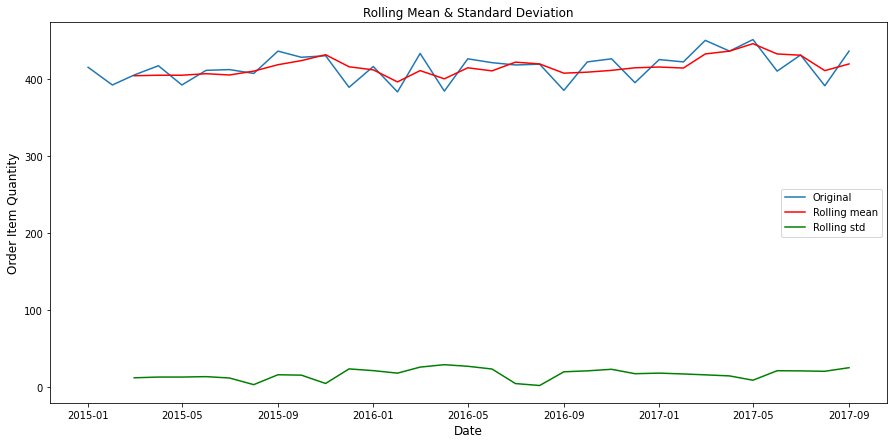

In [95]:
plt.figure(figsize=(15,7))
plt.plot(Monthly_Quantity["Order Item Quantity"], label='Original')
plt.plot(Monthly_Quantity["Order Item Quantity"].rolling(window=3).mean(), color='red', label='Rolling mean')
plt.plot(Monthly_Quantity["Order Item Quantity"].rolling(window=3).std(), color='green', label='Rolling std')
plt.xlabel('Date', fontsize=12)
plt.ylabel('Order Item Quantity', fontsize=12)
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')

In [96]:
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, plot_predict
from statsmodels.tsa.arima.model import ARIMA
%matplotlib inline

TEST for checking the stationarity of Data

In [97]:
adf_test = adfuller(Monthly_Quantity)
print(f'p-value: {adf_test[1]}')

p-value: 0.07416887626674869


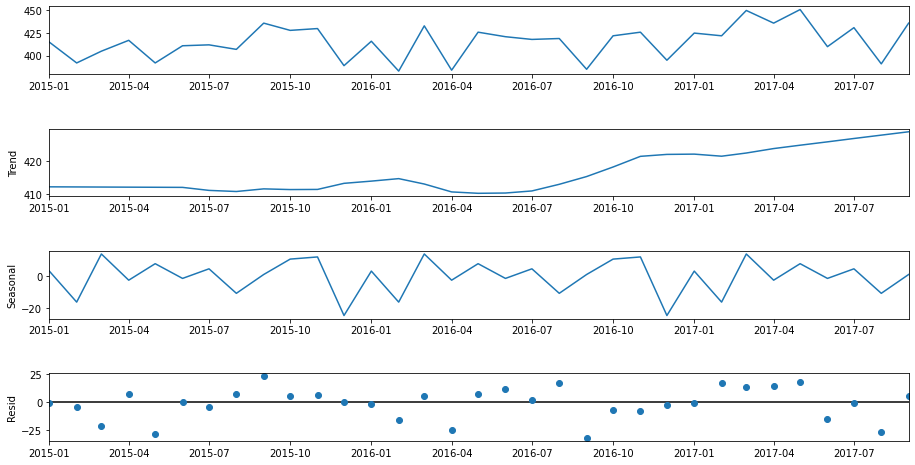

In [98]:
def seasonal_decompose (Monthly_Quantity):
    decomposition = sm.tsa.seasonal_decompose(Monthly_Quantity, model='additive', extrapolate_trend=12)
    
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid
    
    fig = decomposition.plot()
    fig.set_size_inches(14, 7)
    plt.show()
    
    return trend, seasonal, residual
 
trend, seasonal, residual = seasonal_decompose(Monthly_Quantity)

Text(0.5, 1.0, 'Daily_Sales')

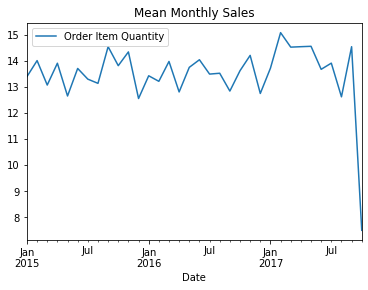

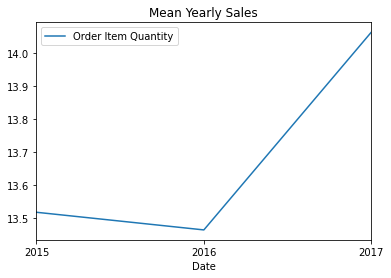

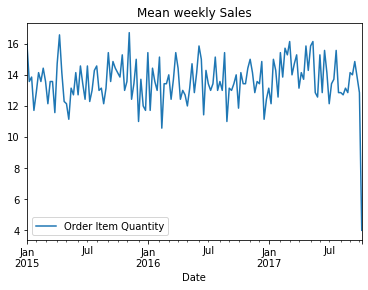

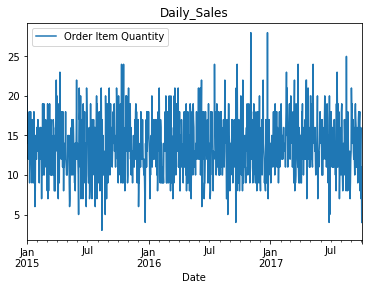

In [99]:
sales_agg_monthly = Camping_Hiking_Sold.resample("M")[["Order Item Quantity"]].mean()
sales_agg_monthly.plot()
plt.title('Mean Monthly Sales')

sales_agg_yearly = Camping_Hiking_Sold.resample("Y")[["Order Item Quantity"]].mean()
sales_agg_yearly.plot()
plt.title('Mean Yearly Sales')

sales_agg_weekly = Camping_Hiking_Sold.resample("W")[["Order Item Quantity"]].mean()
sales_agg_weekly.plot()
plt.title('Mean weekly Sales')

sales_agg_daily = Camping_Hiking_Sold.resample("D")[["Order Item Quantity"]].mean()
sales_agg_daily.plot()
plt.title('Daily_Sales')

In [100]:
pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 26.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 59.8 MB/s eta 0:00:00
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [101]:
from pmdarima import auto_arima

Adding the Exogenous Discount feature

In [102]:
Monthly_Discount.drop(Monthly_Discount.tail(1).index,inplace=True)
Monthly_Discount.shape

(33, 1)

In [103]:
Exog = Monthly_Discount[['Order Item Discount']].to_numpy()

In [104]:
# Split the data into training and test sets
train_data = Monthly_Quantity[:int(0.8*len(Monthly_Quantity))]
test_data = Monthly_Quantity[int(0.8*len(Monthly_Quantity)):]

# Create an auto_arima model
model = auto_arima(train_data, exogenous=Exog, start_p=1, start_q=1, max_p=3, max_q=3, m=12,
                      start_P=0, seasonal=True, d=1, D=1, trace=True,
                      error_action='ignore', suppress_warnings=True, stepwise=True)  # set to stepwise



Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[12]             : AIC=inf, Time=0.48 sec
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=132.419, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=128.574, Time=0.27 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=0.43 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=127.306, Time=0.05 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=inf, Time=0.24 sec
 ARIMA(1,1,0)(1,1,1)[12]             : AIC=130.572, Time=0.46 sec
 ARIMA(2,1,0)(0,1,0)[12]             : AIC=128.531, Time=0.06 sec
 ARIMA(1,1,1)(0,1,0)[12]             : AIC=inf, Time=0.11 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=inf, Time=0.07 sec
 ARIMA(2,1,1)(0,1,0)[12]             : AIC=inf, Time=0.17 sec
 ARIMA(1,1,0)(0,1,0)[12] intercept   : AIC=129.033, Time=0.08 sec

Best model:  ARIMA(1,1,0)(0,1,0)[12]          
Total fit time: 2.459 seconds


In [105]:
# Fit the model to the training data
model.fit(train_data)

# Make predictions on the test data
predictions = model.predict(n_periods=len(test_data),exogenous=Exog)

In [106]:
predictions

2017-03-01    452.814171
2017-04-01    416.084039
2017-05-01    450.237119
2017-06-01    450.255441
2017-07-01    444.046086
2017-08-01    447.098557
2017-09-01    411.785945
Freq: MS, dtype: float64

Evaluate the model's performance

In [107]:
MAE = (mean_absolute_error(test_data,predictions))
print("MAE:", MAE)

MAE: 22.443878850628153


In [108]:
rmse = sqrt(mean_squared_error(test_data, predictions))
print(f' Root Mean Squared Error: {rmse:.3f}')

 Root Mean Squared Error: 29.104


In [109]:

MAPE = (mean_absolute_percentage_error(test_data, predictions))*100
print("MAPE:", MAPE)

MAPE: 5.444125604714629


# ARIMA PREDICTION

In [127]:
Arima_prediction2 = predictions.iloc[1:2]
Arima_prediction2 = Arima_prediction2.tolist()
print(Arima_prediction2)
print(Actual_value2)

[416.0840388242893]
24    436
Name: Order Item Quantity, dtype: int64


In [128]:
print("\tMean absolute error (MAE):", mean_absolute_error(Actual_value2, Arima_prediction2))

	Mean absolute error (MAE): 19.91596117571072


#Exponential Smoothing

In [110]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [111]:
def simple_exponential_smoothing(MonthlyItemQuantity, alpha):
    """
    Perform simple exponential smoothing.
    Args:
        series: input series
        alpha: smoothing factor (between 0 and 1)
    Returns:
        smoothed series
    """
    # Initialize the smoothed series with the first value of the input series
    smoothed_series = [MonthlyItemQuantity[0]]
    # Loop through the rest of the series
    for t in range(1, len(MonthlyItemQuantity)):
        # Calculate the smoothed value for time t
        smoothed_series.append(alpha * MonthlyItemQuantity[t] + (1 - alpha) * smoothed_series[t-1])
    return smoothed_series

In [112]:
alpha = 0.7

smoothed_series = simple_exponential_smoothing(MonthlyItemQuantity, alpha)
print(smoothed_series)

[417, 399.5, 407.55, 410.66499999999996, 408.0995, 427.62985000000003, 427.888955, 429.3666865, 401.11000594999996, 411.533001785, 391.5599005355, 420.56797016064996, 394.970391048195, 416.6911173144585, 419.7073351943376, 418.5122005583013, 418.8536601674904, 395.1560980502471, 413.94682941507415, 422.38404882452227, 403.2152146473567, 418.464564394207, 420.9393693182621, 441.28181079547863, 437.5845432386436, 446.9753629715931, 421.09260889147794, 428.0277826674434, 402.108334800233, 425.8325004400699]


In [113]:
errors = []
for a, f in zip(MonthlyItemQuantity, smoothed_series):
    errors.append(a - f)

# Calculate the MSE
mse = np.sum(np.square(errors)) / len(errors)

# Calculate the RMSE
rmse = np.sqrt(mse)

print("Errors:", errors)
print("RMSE:", rmse)

MAE = (mean_absolute_error(smoothed_series,MonthlyItemQuantity))
print("MAE:", MAE)

MAPE = (mean_absolute_percentage_error(smoothed_series, MonthlyItemQuantity))*100
print("MAPE:", MAPE)


Errors: [0, -7.5, 3.4499999999999886, 1.3350000000000364, -1.0994999999999777, 8.370149999999967, 0.11104499999999007, 0.6333134999999857, -12.110005949999959, 4.46699821499999, -8.559900535499992, 12.432029839350037, -10.970391048194983, 9.308882685541505, 1.2926648056624117, -0.5122005583012879, 0.146339832509625, -10.156098050247124, 8.053170584925851, 3.6159511754777327, -8.215214647356675, 6.535435605792998, 1.060630681737905, 8.718189204521366, -1.5845432386436187, 4.024637028406914, -11.092608891477937, 2.9722173325566246, -11.108334800233024, 10.167499559930093]
RMSE: 7.049301744574213
MAE: 5.653431759045587
MAPE: 1.370418494392584


# Exponential Smoothing PREDICTION

In [129]:
Monthly_Quantity.shape


(33, 1)

In [130]:
train_data = Monthly_Quantity[:int(0.8*len(Monthly_Quantity))]
test_data = Monthly_Quantity[int(0.8*len(Monthly_Quantity)):]

In [131]:
model = SimpleExpSmoothing(train_data['Order Item Quantity'])
fit = model.fit(smoothing_level=alpha)

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/base/tsa_model.py:524: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  # If an index is available, see if it is a date-based index or if it


In [132]:
ES_predictions2 = fit.predict(start=test_data.index[0], end=test_data.index[-1])

In [133]:
ES_prediction2 = ES_predictions2.iloc[1:2]
ES_prediction2 = ES_prediction2.tolist()
ES_prediction2

[420.93936931824896]

In [134]:
print("\tMean absolute error (MAE):", mean_absolute_error(Actual_value2, ES_prediction2))

	Mean absolute error (MAE): 15.060630681751036


# COMBINING PREDICTION OF THE 5 MODELS

In [135]:
df_vertical = pd.concat([xgboost_prediction2, linear_prediction2, Forest_prediction2])

In [136]:
array = df_vertical.values
array

array([[433.38787842],
       [437.02529098],
       [434.03      ]])

In [137]:
array = np.append(array, Arima_prediction2)
print(array)

[433.38787842 437.02529098 434.03       416.08403882]


# INPUT FOR Multilayer perceptron

In [138]:
input_array = np.append(array, ES_prediction2)
print(input_array)

[433.38787842 437.02529098 434.03       416.08403882 420.93936932]


In [139]:
Actual_value2

24    436
Name: Order Item Quantity, dtype: int64

#FINAL OUTPUT

Implement multilayer perceptron to get the final forecast for Camping & Hiking Category

In [140]:
input = input_array

In [144]:
import numpy as np

class MLP:
    def __init__(self, input_size, hidden_size_1, hidden_size_2, output_size):
        self.input_size = input_size
        self.hidden_size_1 = hidden_size_1
        self.hidden_size_2 = hidden_size_2
        self.output_size = output_size

        # Initialize weights and biases
        self.weights_input_hidden_1 = np.random.randn(self.input_size, self.hidden_size_1)
        self.biases_input_hidden_1 = np.zeros(self.hidden_size_1)
        self.weights_hidden_1_hidden_2 = np.random.randn(self.hidden_size_1, self.hidden_size_2)
        self.biases_hidden_1_hidden_2 = np.zeros(self.hidden_size_2)
        self.weights_hidden_2_output = np.random.randn(self.hidden_size_2, self.output_size)
        self.biases_hidden_2_output = np.zeros(self.output_size)

    def forward(self, input):
        # Propagate input through the network
        self.hidden_1 = np.dot(input, self.weights_input_hidden_1) + self.biases_input_hidden_1
        self.hidden_2 = np.dot(self.hidden_1, self.weights_hidden_1_hidden_2) + self.biases_hidden_1_hidden_2
        self.output = np.dot(self.hidden_2, self.weights_hidden_2_output) + self.biases_hidden_2_output
        return self.output

# Create an MLP with 5 inputs,


# Create an MLP with 5 inputs, 2 hidden layers, and 1 output
mlp = MLP(5, 4, 3, 1)

# Propagate some input through the network and print the output
input = input_array
output = mlp.forward(input)
print(output)


[431.0457245]


# Calculate Error for final Output

In [145]:
print("\tMean absolute error (MAE):", mean_absolute_error(Actual_value2, output))

	Mean absolute error (MAE): 4.954275495633851
